In [4]:
!pip install -q qiskit
!pip install -q qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.3 MB/s eta 0:00:00


In [10]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

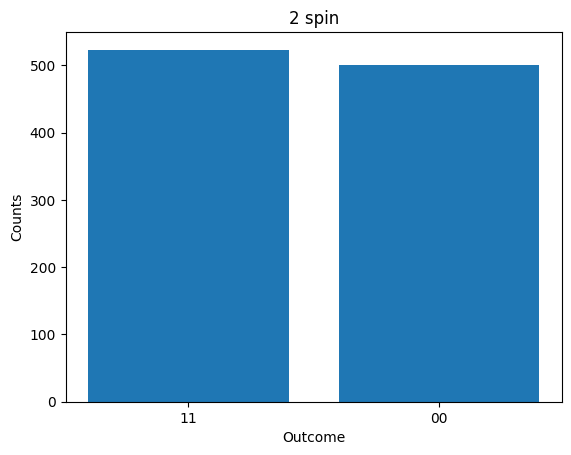

In [18]:
#2-spin
J = 1
t = 1


qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.cx(0, 1)

qc2.rxx(2 * J * t, 0, 1)
qc2.ryy(2 * J * t, 0, 1)
qc2.rzz(2 * J * t, 0, 1)

qc2.measure_all()

simulator = AerSimulator()
result = simulator.run(qc2).result()
output = result.get_counts()

labels = list(output.keys())
values = list(output.values())

plt.bar(labels, values)
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.title('2 spin')

plt.show()

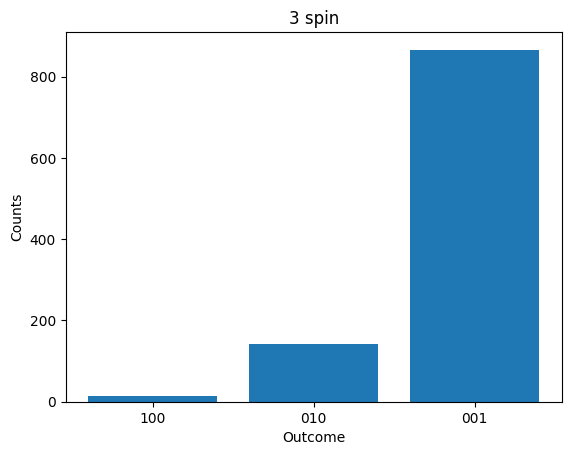

In [20]:
#3-spin
qc3 = QuantumCircuit(3)
qc3.x(0)
qc3.cx(1,2)

stepper = t / 5
for i, j in [(0, 1), (1, 2)]:
    qc3.rxx(2 * J * stepper, i, j)
    qc3.ryy(2 * J * stepper, i, j)
    qc3.rzz(2 * J * stepper, i, j)

qc3.measure_all()
result = simulator.run(qc3).result()
output = result.get_counts()
labels = list(output.keys())
values = list(output.values())

plt.bar(labels, values)
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.title('3 spin')

plt.show()